In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np
import random

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
data_dir = "/content/drive/MyDrive/cvpr_img_dataset"

In [36]:
batch_size = 64
img_size = (300,300)
num_classes = len(os.listdir(data_dir))
print(num_classes)

87


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split = 0.2,
)

In [ ]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)

Found 1260 images belonging to 87 classes.


In [41]:
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 302 images belonging to 87 classes.


In [42]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['21-45902-3', '22-46138-1', '22-46139-1', '22-46141-1', '22-46156-1', '22-46258-1', '22-46275-1', '22-46293-1', '22-46342-1', '22-46473-1', '22-46536-1', '22-46590-1', '22-46666-1', '22-46679-1', '22-46877-1', '22-46877-1 (1)', '22-46887-1', '22-46931-1', '22-46945-1', '22-46983-1', '22-47027-1', '22-47180-1 ', '22-47294-1', '22-47384-2', '22-47402-2', '22-47542-2', '22-47813-2', '22-47884-2', '22-47892-2', '22-47894-2', '22-47898-2', '22-47925-2', '22-47968-2', '22-48005-2', '22-48021-2', '22-48023-2 ', '22-48039-2', '22-48055-2', '22-48064-2', '22-48091-2', '22-48133-2 ', '22-48205-2', '22-48310-3', '22-48434-3', '22-48541-3', '22-48569-3', '22-48582-3', '22-48666-3', '22-48682-3', '22-48725-3', '22-48833-3', '22-48841-3', '22-48915-3', '22-49037-3', '22-49068-3', '22-49167-3', '22-49196-3', '22-49331-3', '22-49338-3', '22-49355-3', '22-49370-3', '22-49421-3', '22-49450-3', '22-49451-3', '22-49453-3', '22-49507-3', '22-49575-3', '22-49609-3', '22-49643-3', '22-49745-3', '22-49783-3'

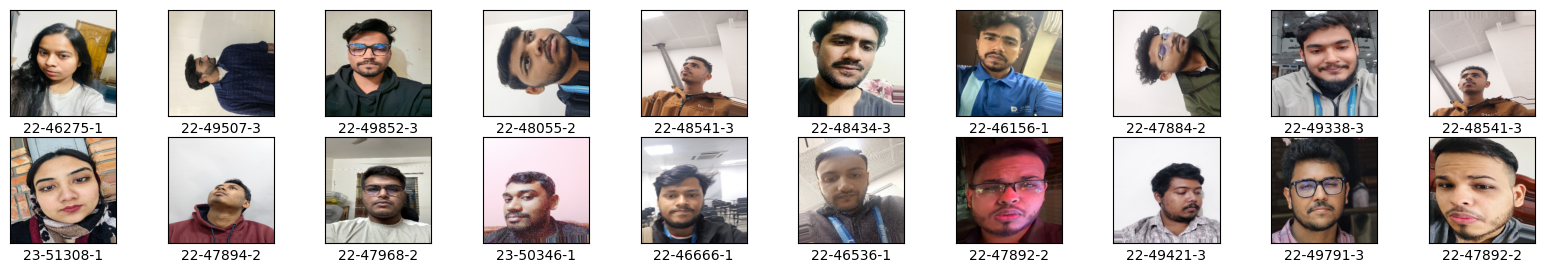

In [43]:
images, labels = next(train_generator)

label_indices = np.argmax(labels, axis=1)

plt.figure(figsize=(20, 8))

for i in range(20):
    plt.subplot(5, 10, i + 1)

    img = images[i]
    img = img - img.min()
    img = img / img.max()

    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[label_indices[i]])

plt.show()

In [44]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False
base_model.summary()

Model: "efficientnetb3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 300, 300,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 300, 300,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 300, 300,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        960 │ block1a_se_excit

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

In [45]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 10, 10, 1536)   │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 87)             │        44,631 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,615,110 (44.31 MB)

 Trainable params: 831,575 (3.17 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 188s 8s/step - accuracy: 0.1310 - loss: 4.0604 - val_accuracy: 0.6159 - val_loss: 2.2313
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 0.6144 - loss: 1.9349 - val_accuracy: 0.7980 - val_loss: 1.0700
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 116s 6s/step - accuracy: 0.7967 - loss: 1.0306 - val_accuracy: 0.8212 - val_loss: 0.7158
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 0.8411 - loss: 0.6793 - val_accuracy: 0.8808 - val_loss: 0.5542
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.9085 - loss: 0.3976 - val_accuracy: 0.8907 - val_loss: 0.4888
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.9247 - loss: 0.3294 - val_accuracy: 0.9106 - val_loss: 0.3930
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.9549 - loss: 0.2499 - val_accuracy: 0.9139 - val_loss: 0.3704
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 6s/step - accuracy: 0.9450 - loss: 0.2280 - val_accuracy: 0.9106 - v

In [48]:
base_model.trainable = True
for layer in base_model.layers:
    if not (layer.name.startswith("block6"+"block7")):
        layer.trainable = False
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

In [49]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
fine_tune_history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 189s 8s/step - accuracy: 0.9754 - loss: 0.1400 - val_accuracy: 0.9139 - val_loss: 0.3149
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.9747 - loss: 0.1282 - val_accuracy: 0.9272 - val_loss: 0.2849
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.9788 - loss: 0.1053 - val_accuracy: 0.9272 - val_loss: 0.2698
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.9737 - loss: 0.1127 - val_accuracy: 0.9338 - val_loss: 0.2753
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.9813 - loss: 0.1146 - val_accuracy: 0.9205 - val_loss: 0.3150
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.9668 - loss: 0.1290 - val_accuracy: 0.9272 - val_loss: 0.2802
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.9801 - loss: 0.1086 - val_accuracy: 0.9338 - val_loss: 0.2610
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.9817 - loss: 0.0913 - val_accuracy: 0.9172 - v

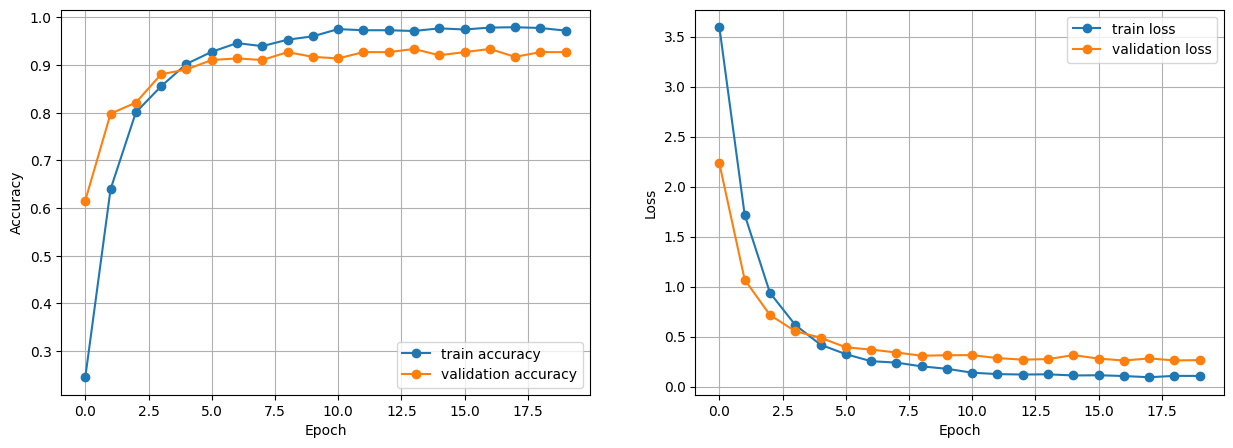

In [53]:
acc = history.history['accuracy'] + fine_tune_history.history['accuracy']
val_acc = history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']

loss = history.history['loss'] + fine_tune_history.history['loss']
val_loss = history.history['val_loss'] + fine_tune_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(acc, 'o-', label='train accuracy')
plt.plot(val_acc, 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(loss, 'o-', label='train loss')
plt.plot(val_loss, 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [54]:
final_loss, final_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {final_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.9260 - loss: 0.2476
Test accuracy: 92.38%


In [55]:
predictions = model.predict(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step


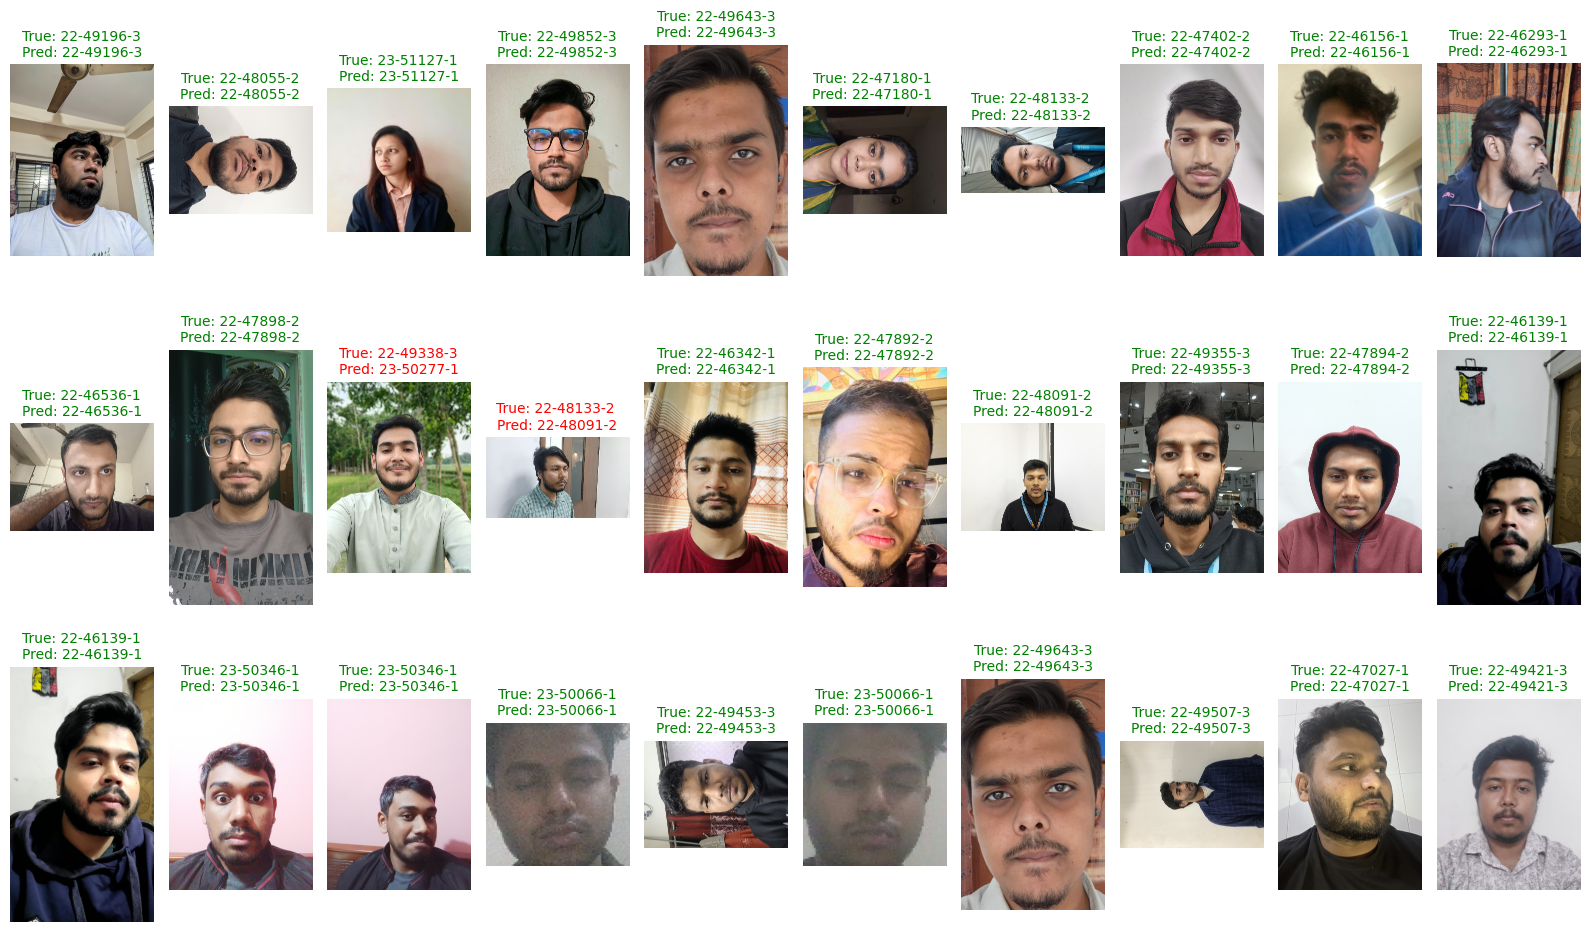

In [74]:
test_img_pred = np.argmax(predictions, axis=1)

true_test_labels = test_generator.labels

paths = test_generator.filepaths
class_names = list(test_generator.class_indices.keys())

idxs = random.sample(range(len(paths)), 30)

plt.figure(figsize=(16, 10))

for j, i in enumerate(idxs):
    plt.subplot(3, 10, j + 1)

    img = plt.imread(paths[i])
    plt.imshow(img)

    is_correct = test_img_pred[i] == true_test_labels[i]
    color = 'green' if is_correct else 'red'

    plt.title(f"True: {class_names[true_test_labels[i]]}\nPred: {class_names[test_img_pred[i]]}",
              color=color, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [75]:
model.save('/content/drive/MyDrive/model/ams_tl.keras')